ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [1]:
import seaborn as sns # Import the seaborn library for statistical data visualization, aliasing it as 'sns'
%matplotlib inline # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook

UsageError: unrecognized arguments: # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook


## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn

In [3]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame to get a preview of the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/tmp/ipython-input-2138193059.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill']) # Create a distribution plot (histogram with KDE) of the 'total_bill' column from the 'tips' DataFrame


<Axes: xlabel='total_bill', ylabel='Density'>

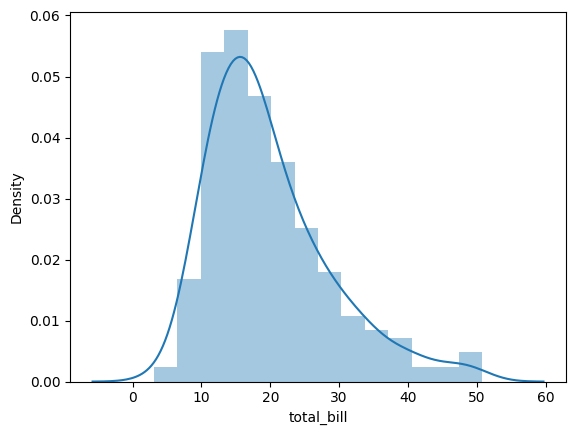

In [4]:
sns.distplot(tips['total_bill']) # Create a distribution plot (histogram with KDE) of the 'total_bill' column from the 'tips' DataFrame
# Safe to ignore warnings # Comment indicating that any warnings generated by this plot can be safely ignored

To remove the kde layer and just have the histogram use:

/tmp/ipython-input-2385127985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30) # Create a distribution plot of 'total_bill' without the KDE curve and with 30 bins for the histogram


<Axes: xlabel='total_bill'>

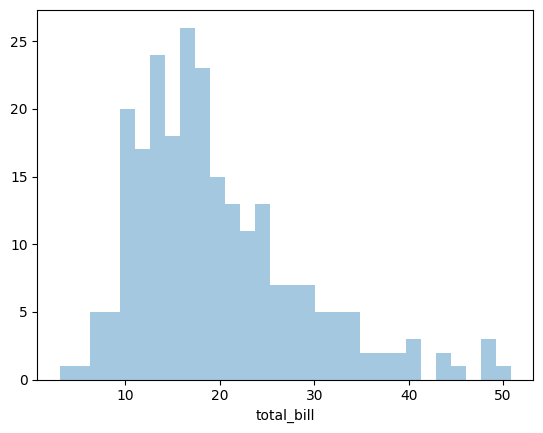

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # Create a distribution plot of 'total_bill' without the KDE curve and with 30 bins for the histogram

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

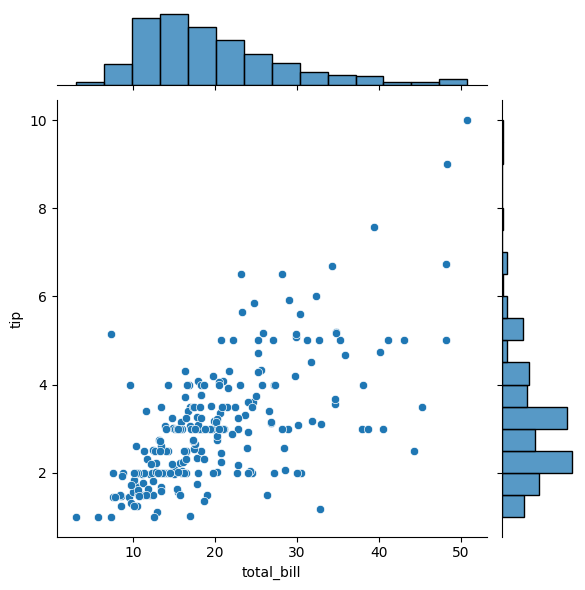

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') # Create a joint plot comparing 'total_bill' and 'tip' with a scatter plot in the center

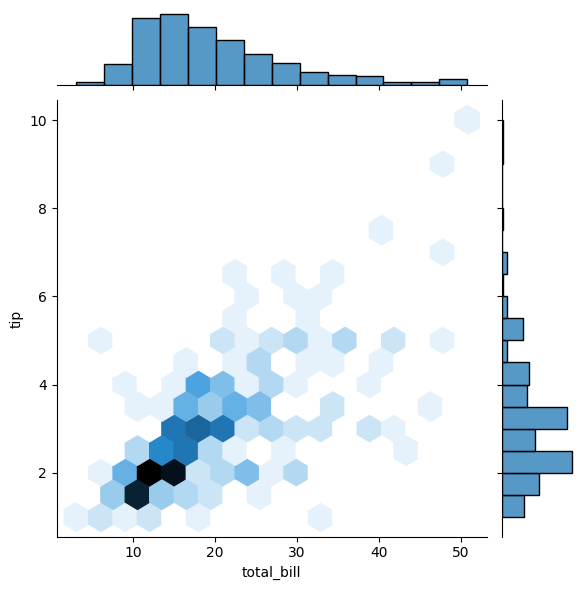

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # Create a joint plot comparing 'total_bill' and 'tip' with a hexagonal binning plot in the center

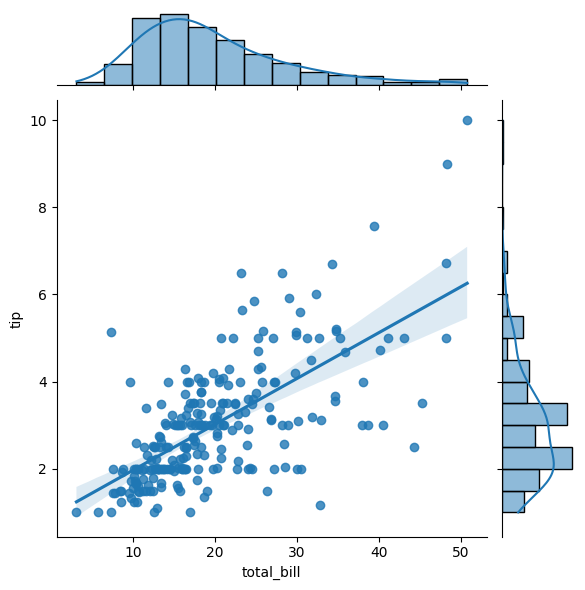

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Create a joint plot comparing 'total_bill' and 'tip' with a regression line and scatter plot in the center

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

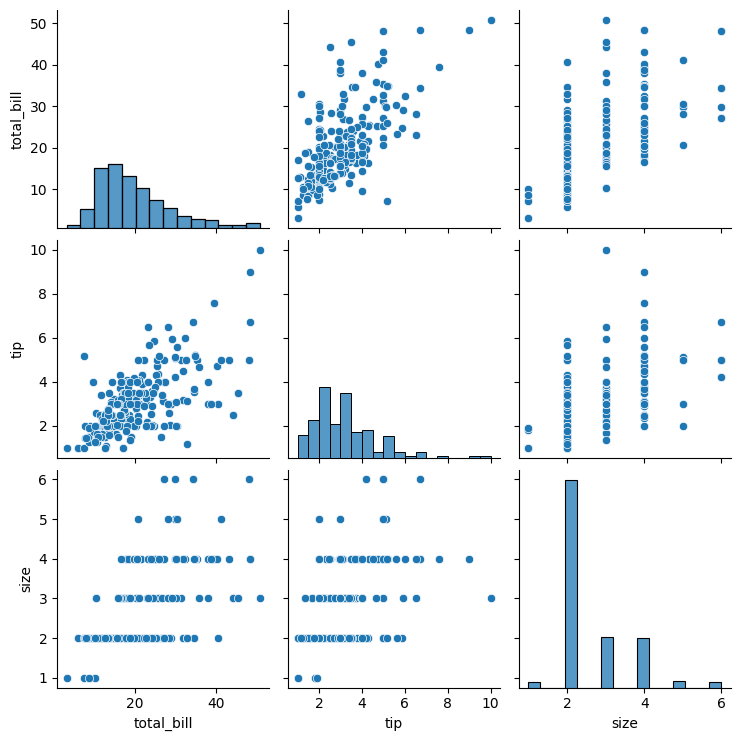

In [9]:
sns.pairplot(tips) # Create a pair plot for all numerical columns in the 'tips' DataFrame

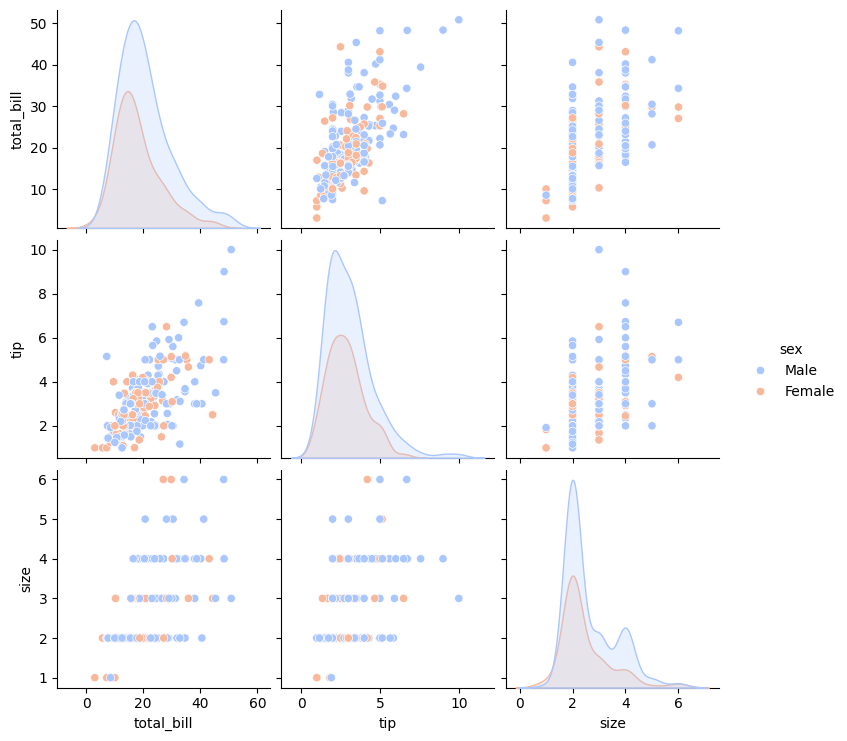

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm') # Create a pair plot for numerical columns in 'tips', coloring points by 'sex' and using the 'coolwarm' color palette

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

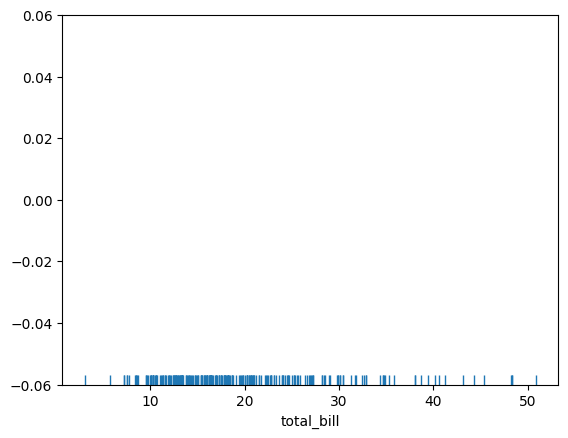

In [11]:
sns.rugplot(tips['total_bill']) # Create a rug plot for the 'total_bill' column, showing individual data points as vertical dashes

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

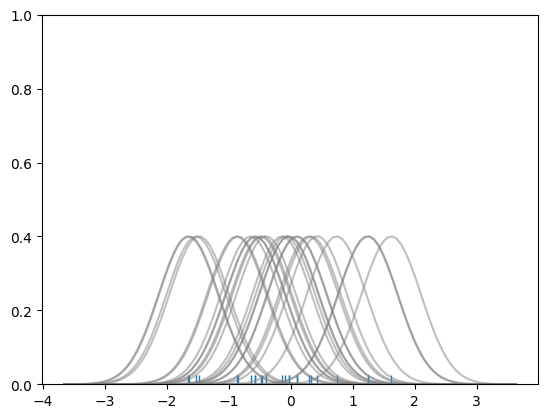

In [12]:
# Don't worry about understanding this code! # Comment indicating that the following code is for demonstration and not essential to understand
# It's just for the diagram below # Further explanation that the code is for generating a diagram
import numpy as np # Import the numpy library for numerical operations, aliasing it as 'np'
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module for plotting, aliasing it as 'plt'
from scipy import stats # Import the stats module from the scipy library for statistical functions

#Create dataset # Comment indicating the creation of a dataset
dataset = np.random.randn(25) # Generate a dataset of 25 random numbers from a standard normal distribution

# Create another rugplot # Comment indicating the creation of another rug plot
sns.rugplot(dataset); # Create a rug plot for the generated 'dataset'

# Set up the x-axis for the plot # Comment indicating x-axis setup
x_min = dataset.min() - 2 # Calculate the minimum x-axis value for plotting
x_max = dataset.max() + 2 # Calculate the maximum x-axis value for plotting

# 100 equally spaced points from x_min to x_max # Comment indicating creation of x-axis points
x_axis = np.linspace(x_min,x_max,100) # Generate 100 equally spaced points between x_min and x_max

# Set up the bandwidth, for info on this: # Comment indicating bandwidth setup
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth' # Define a URL for more information on bandwidth

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2 # Calculate the optimal bandwidth for KDE using Scott's Rule


# Create an empty kernel list # Comment indicating creation of an empty list for kernels
kernel_list = [] # Initialize an empty list to store kernel functions

# Plot each basis function # Comment indicating the plotting of individual basis functions
for data_point in dataset: # Loop through each data point in the dataset

    # Create a kernel for each point and append to list # Comment indicating kernel creation and appending
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) # Create a normal distribution (kernel) centered at data_point with calculated bandwidth
    kernel_list.append(kernel) # Add the generated kernel to the list

    #Scale for plotting # Comment indicating scaling for plotting
    kernel = kernel / kernel.max() # Normalize the kernel to its maximum value
    kernel = kernel * .4 # Scale the normalized kernel for better visualization
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5) # Plot the scaled kernel with grey color and transparency

plt.ylim(0,1) # Set the y-axis limits for the plot

Text(0.5, 0.98, 'Sum of the Basis Functions')

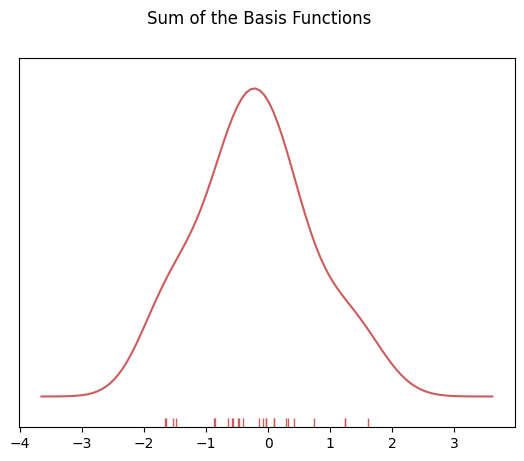

In [13]:
# To get the kde plot we can sum these basis functions. # Comment explaining the purpose of summing basis functions

# Plot the sum of the basis function # Comment indicating the plotting of the sum
sum_of_kde = np.sum(kernel_list,axis=0) # Sum all the individual kernel functions to get the KDE curve

# Plot figure # Comment indicating figure plotting
fig = plt.plot(x_axis,sum_of_kde,color='indianred') # Plot the summed KDE curve with 'indianred' color

# Add the initial rugplot # Comment indicating adding the rug plot
sns.rugplot(dataset,c = 'indianred') # Add a rug plot for the dataset with 'indianred' color

# Get rid of y-tick marks # Comment indicating removal of y-tick marks
plt.yticks([]) # Remove y-axis tick marks

# Set title # Comment indicating title setting
plt.suptitle("Sum of the Basis Functions") # Set the super title of the plot

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

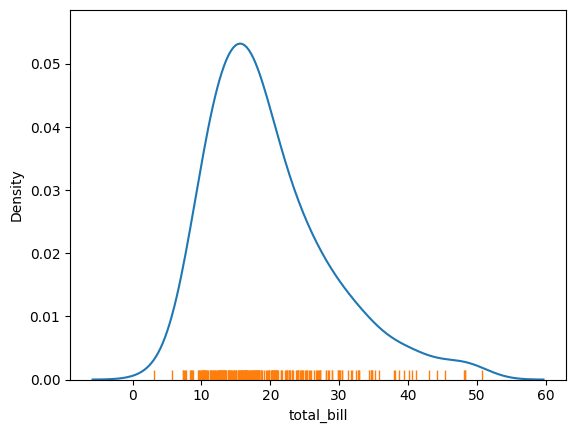

In [14]:
sns.kdeplot(tips['total_bill']) # Create a Kernel Density Estimate plot for the 'total_bill' column
sns.rugplot(tips['total_bill']) # Add a rug plot to the KDE plot for 'total_bill'

<Axes: xlabel='tip', ylabel='Density'>

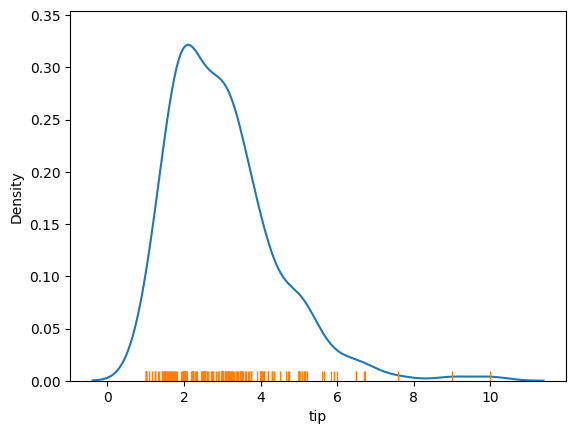

In [15]:
sns.kdeplot(tips['tip']) # Create a Kernel Density Estimate plot for the 'tip' column
sns.rugplot(tips['tip']) # Add a rug plot to the KDE plot for 'tip'

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [16]:
import seaborn as sns # Import the seaborn library for statistical data visualization, aliasing it as 'sns'
%matplotlib inline # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook

UsageError: unrecognized arguments: # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook


In [17]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn
tips.head() # Display the first 5 rows of the 'tips' DataFrame to get a preview of the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

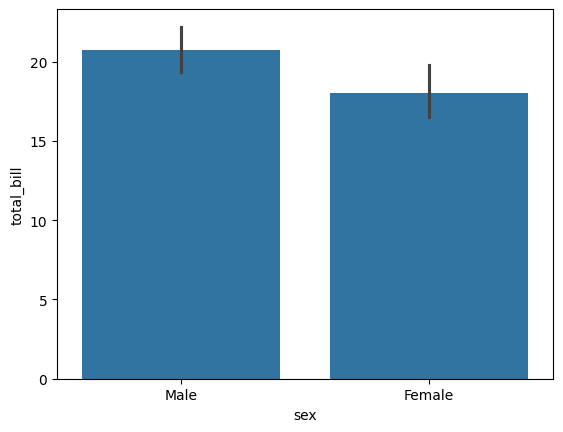

In [18]:
sns.barplot(x='sex',y='total_bill',data=tips) # Create a bar plot showing the mean 'total_bill' for each 'sex' category

In [19]:
import numpy as np # Import the numpy library for numerical operations, aliasing it as 'np'

You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

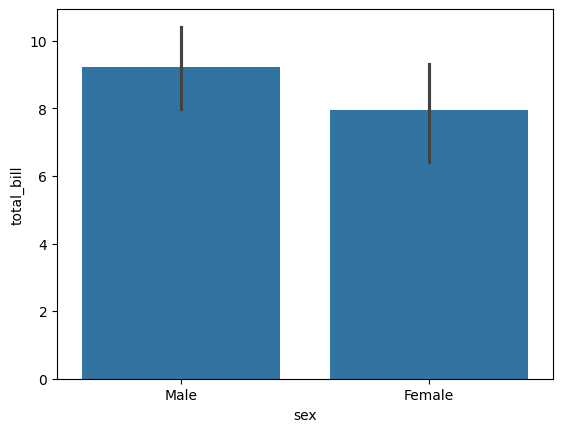

In [20]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # Create a bar plot showing the standard deviation of 'total_bill' for each 'sex' category

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

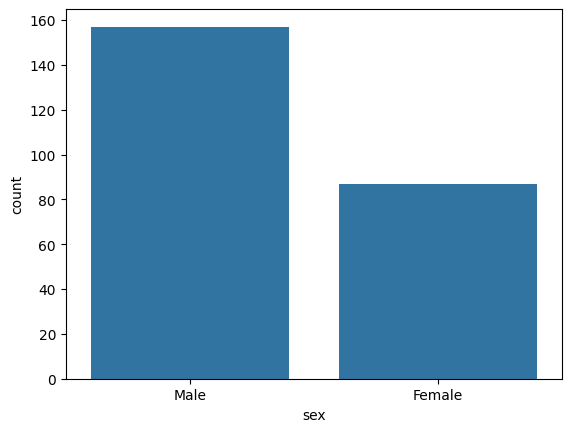

In [21]:
sns.countplot(x='sex',data=tips) # Create a count plot showing the number of occurrences for each 'sex' category

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

/tmp/ipython-input-2256512820.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a box plot showing the distribution of 'total_bill' for each 'day', using the 'rainbow' color palette


<Axes: xlabel='day', ylabel='total_bill'>

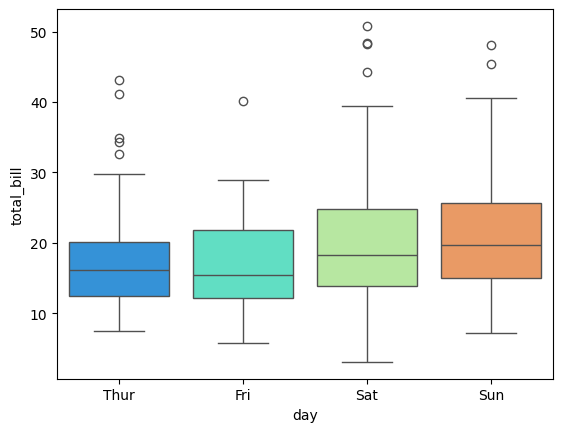

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a box plot showing the distribution of 'total_bill' for each 'day', using the 'rainbow' color palette

<Axes: >

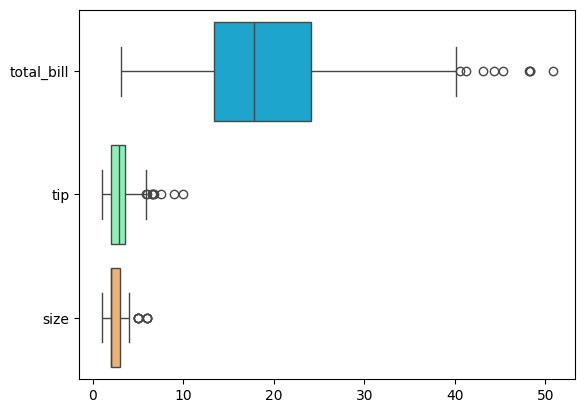

In [23]:
# Can do entire dataframe with orient='h' # Comment indicating that the entire DataFrame can be plotted horizontally
sns.boxplot(data=tips,palette='rainbow',orient='h') # Create horizontal box plots for all numerical columns in the 'tips' DataFrame, using the 'rainbow' color palette

<Axes: xlabel='day', ylabel='total_bill'>

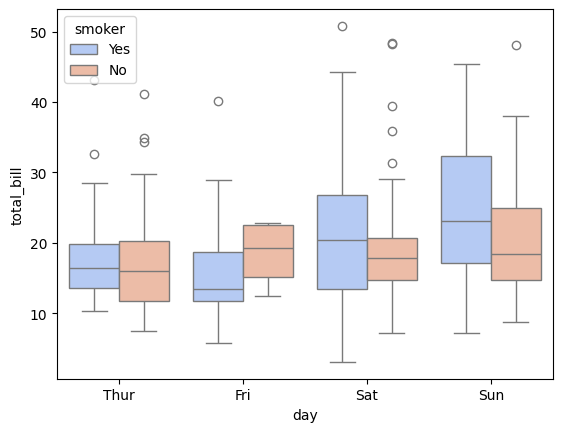

In [24]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm") # Create box plots of 'total_bill' by 'day', split further by 'smoker' status, using the 'coolwarm' palette

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

/tmp/ipython-input-3094716095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a violin plot showing the distribution of 'total_bill' for each 'day', using the 'rainbow' color palette


<Axes: xlabel='day', ylabel='total_bill'>

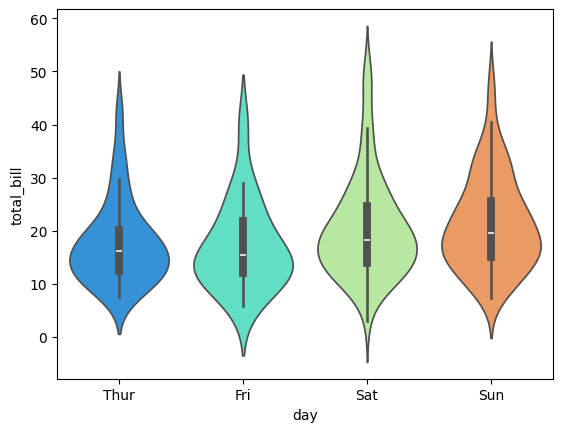

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a violin plot showing the distribution of 'total_bill' for each 'day', using the 'rainbow' color palette

<Axes: xlabel='day', ylabel='total_bill'>

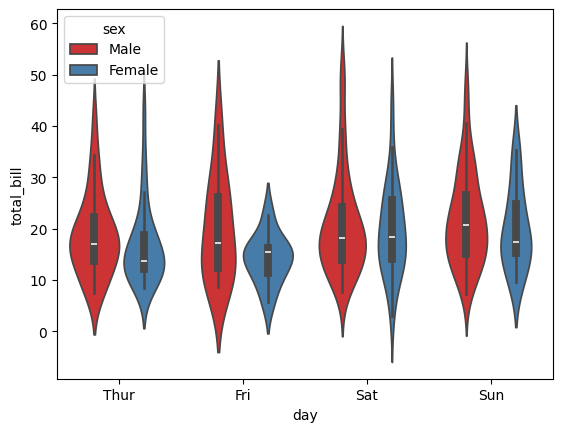

In [26]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1') # Create violin plots of 'total_bill' by 'day', with distributions split and colored by 'sex', using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

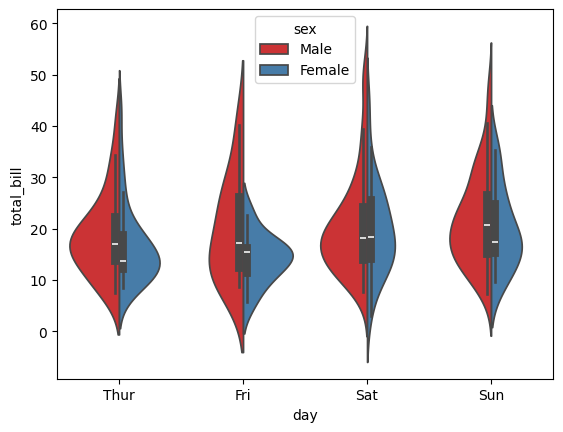

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1') # Create violin plots of 'total_bill' by 'day', with distributions split by 'sex' on each side of the violin, using the 'Set1' palette

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

/tmp/ipython-input-2806321556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # Create a strip plot showing individual 'total_bill' values for each 'day', using the 'rainbow' color palette


<Axes: xlabel='day', ylabel='total_bill'>

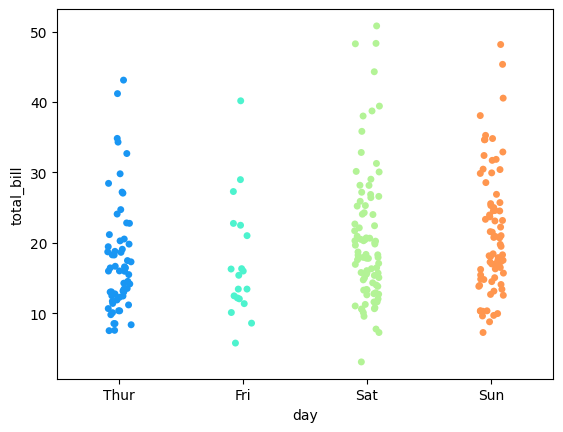

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # Create a strip plot showing individual 'total_bill' values for each 'day', using the 'rainbow' color palette

/tmp/ipython-input-2833970704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # Create a strip plot of 'total_bill' by 'day', with points slightly jittered to reduce overlap, using the 'rainbow' color palette


<Axes: xlabel='day', ylabel='total_bill'>

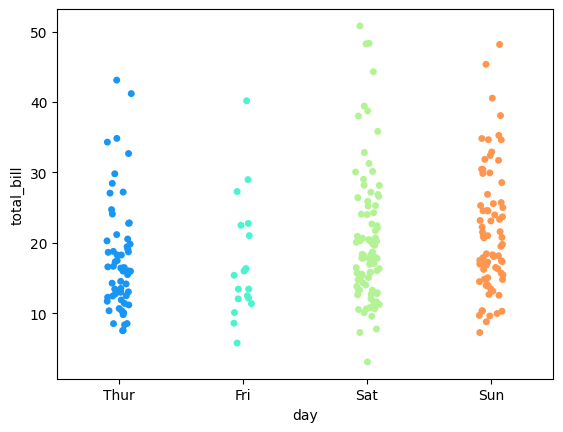

In [29]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # Create a strip plot of 'total_bill' by 'day', with points slightly jittered to reduce overlap, using the 'rainbow' color palette

<Axes: xlabel='day', ylabel='total_bill'>

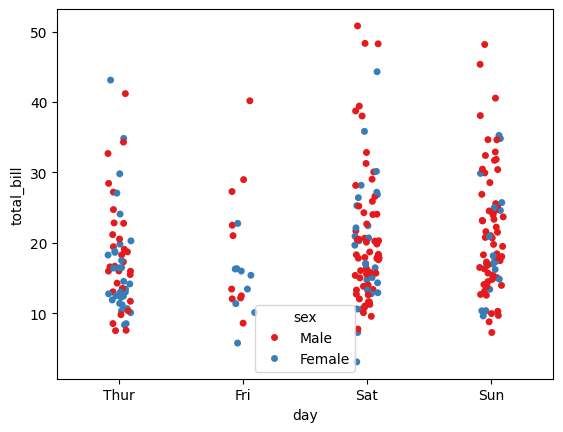

In [30]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1') # Create a strip plot of 'total_bill' by 'day', with jittered points colored by 'sex', using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

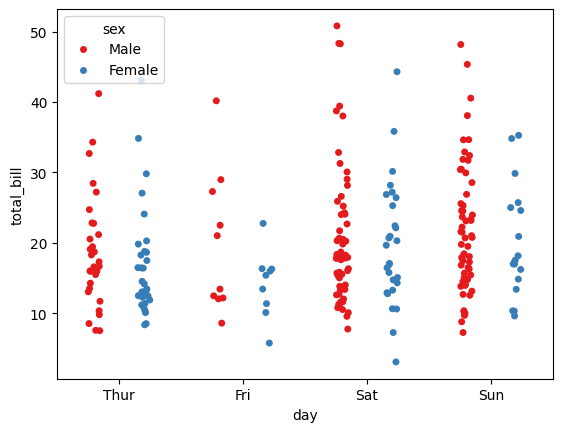

In [31]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True) # Create a strip plot of 'total_bill' by 'day', with jittered points colored by 'sex' and dodged to separate hues, using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

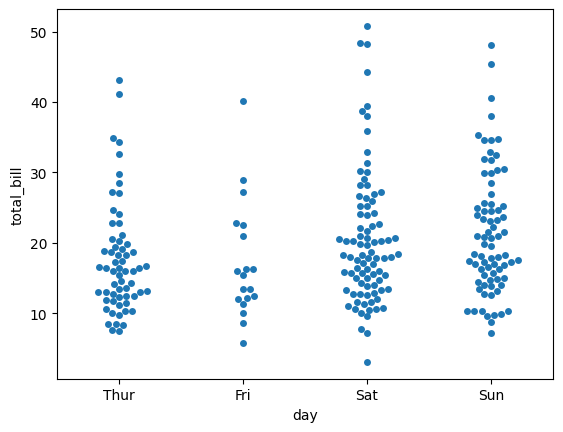

In [32]:
sns.swarmplot(x="day", y="total_bill", data=tips) # Create a swarm plot showing the distribution of 'total_bill' for each 'day', with points adjusted to prevent overlap

### Combining Categorical Plots

/tmp/ipython-input-3115481765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips,palette='rainbow') # Create a violin plot of 'tip' by 'day', using the 'rainbow' color palette


<Axes: xlabel='tip', ylabel='day'>

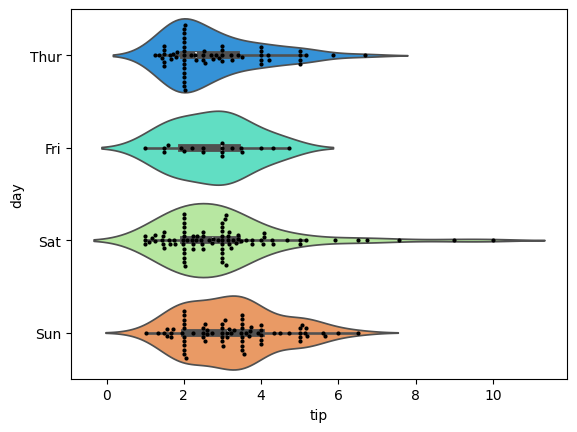

In [33]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow') # Create a violin plot of 'tip' by 'day', using the 'rainbow' color palette
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3) # Overlay a swarm plot of 'tip' by 'day' in black with smaller points on top of the violin plot

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

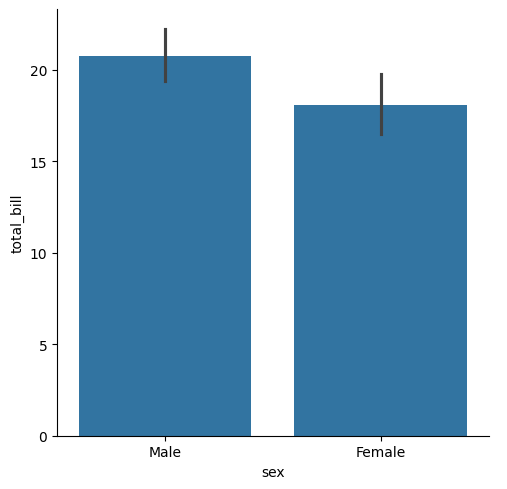

In [34]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar') # Create a categorical plot of 'total_bill' by 'sex', using a bar plot as the kind of visualization

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [35]:
import seaborn as sns # Import the seaborn library for statistical data visualization, aliasing it as 'sns'
%matplotlib inline # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook

UsageError: unrecognized arguments: # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook


In [36]:
flights = sns.load_dataset('flights') # Load the built-in 'flights' dataset from seaborn

In [37]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn (re-loading it here)

In [38]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
flights.head() # Display the first 5 rows of the 'flights' DataFrame

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [40]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
# Matrix form for correlation data # Comment indicating the purpose of the following line
tips.corr() # Calculate the pairwise correlation between numerical columns in the 'tips' DataFrame

ValueError: could not convert string to float: 'No'

In [42]:
sns.heatmap(tips.corr()) # Create a heatmap of the correlation matrix of the 'tips' DataFrame

ValueError: could not convert string to float: 'No'

In [43]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True) # Create a heatmap of the correlation matrix, using the 'coolwarm' color map and annotating cells with correlation values

ValueError: could not convert string to float: 'No'

Or for the flights data:

In [44]:
flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from the 'flights' DataFrame, with 'month' as index, 'year' as columns, and 'passengers' as values

/tmp/ipython-input-3364233275.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from the 'flights' DataFrame, with 'month' as index, 'year' as columns, and 'passengers' as values


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


/tmp/ipython-input-1672054799.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from 'flights' data and store it in 'pvflights'


<Axes: xlabel='year', ylabel='month'>

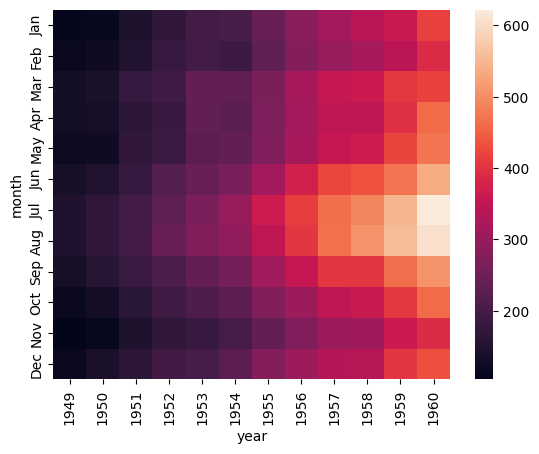

In [45]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from 'flights' data and store it in 'pvflights'
sns.heatmap(pvflights) # Create a heatmap of the 'pvflights' pivot table

<Axes: xlabel='year', ylabel='month'>

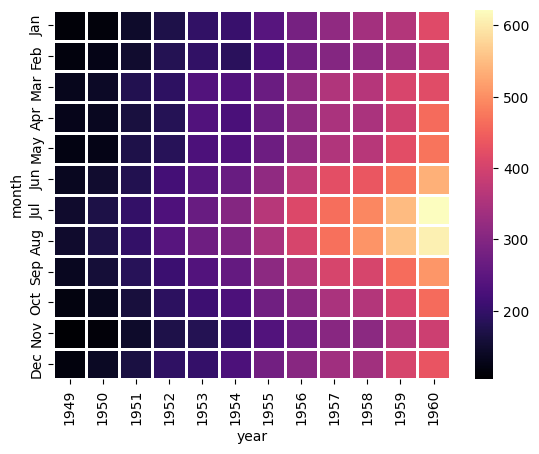

In [46]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1) # Create a heatmap of 'pvflights', using the 'magma' color map, with white lines between cells and a linewidth of 1

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

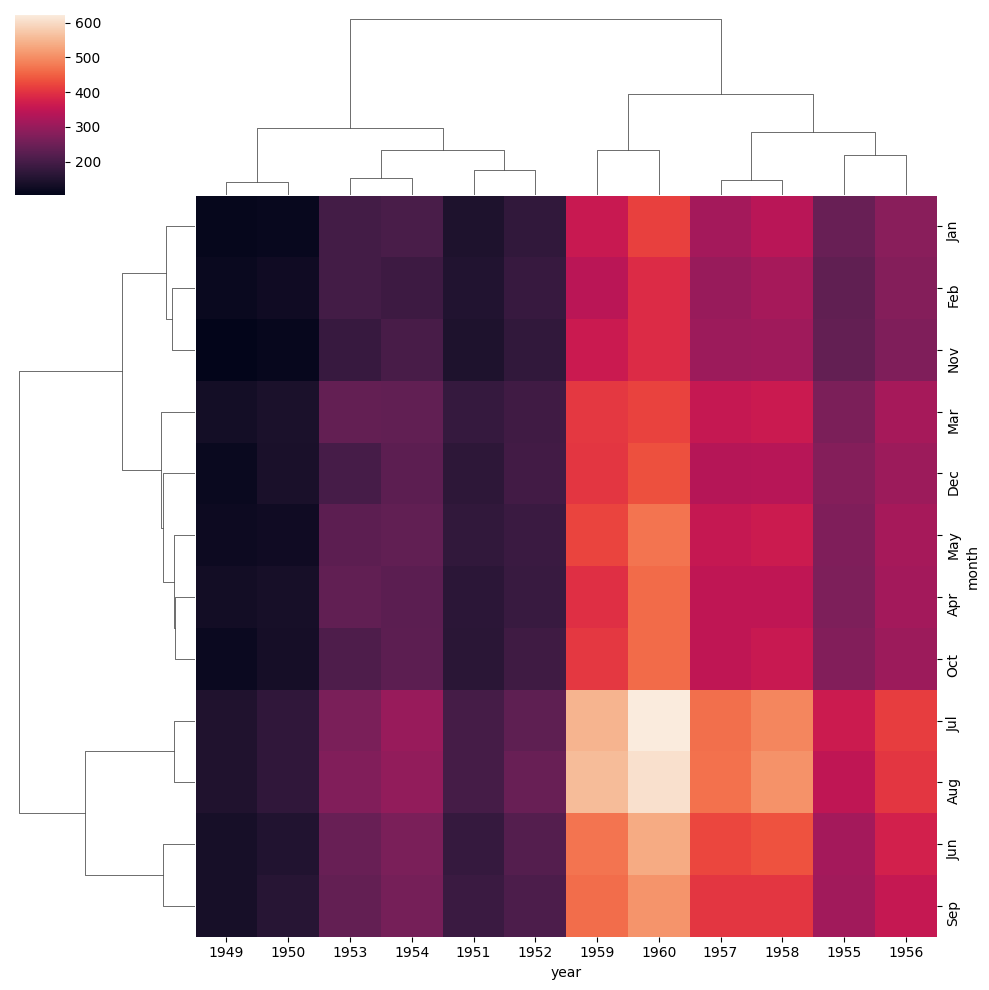

In [47]:
sns.clustermap(pvflights) # Create a clustermap of the 'pvflights' pivot table, performing hierarchical clustering

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

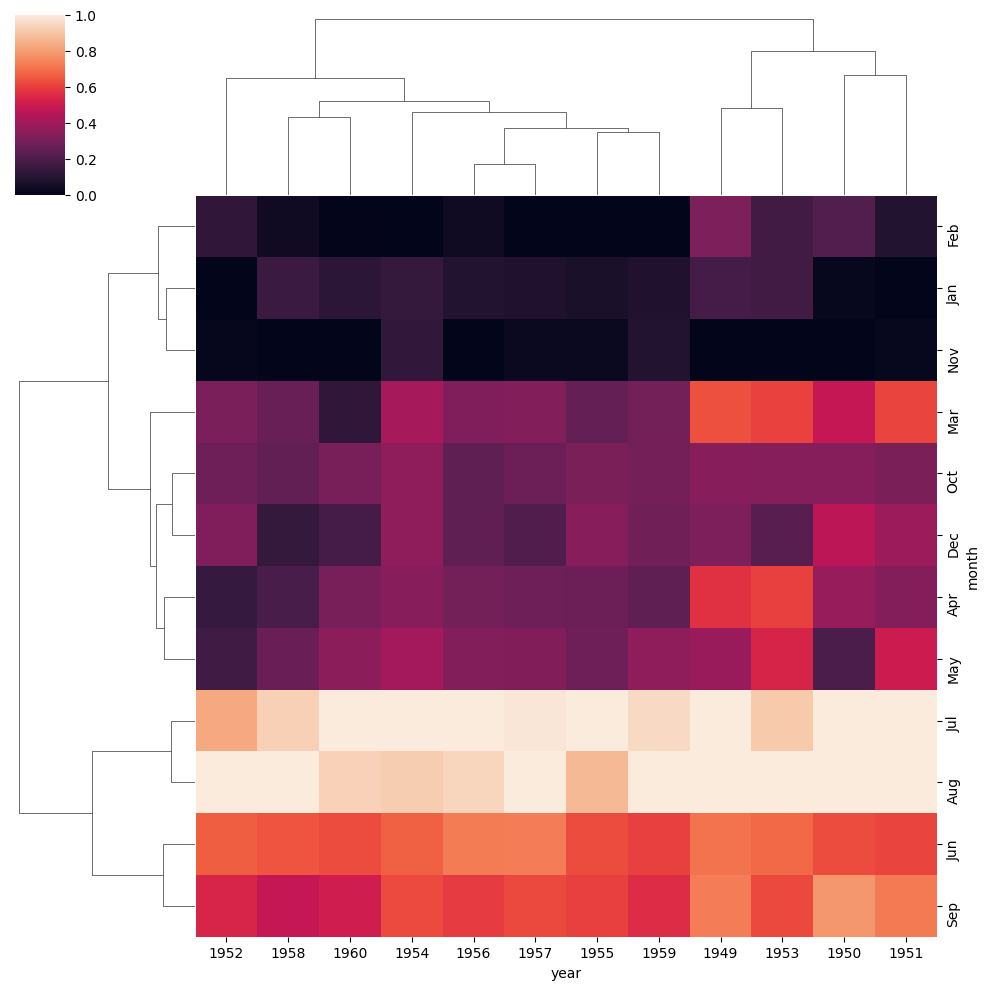

In [48]:
# More options to get the information a little clearer like normalization # Comment indicating more options for clarity and normalization
sns.clustermap(pvflights,standard_scale=1) # Create a clustermap of 'pvflights', scaling the data by row to make comparisons clearer

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [49]:
import seaborn as sns # Import the seaborn library for statistical data visualization, aliasing it as 'sns'
%matplotlib inline # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook

UsageError: unrecognized arguments: # Enable inline plotting for matplotlib, so plots are displayed directly in the notebook


In [50]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn (re-loading it here)

In [51]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

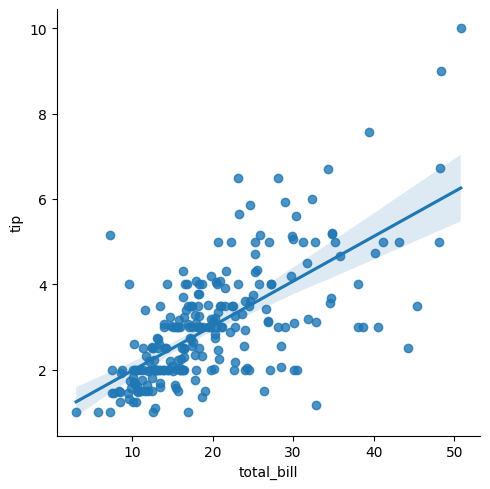

In [52]:
sns.lmplot(x='total_bill',y='tip',data=tips) # Create a linear model plot (scatter plot with regression line) showing the relationship between 'total_bill' and 'tip'

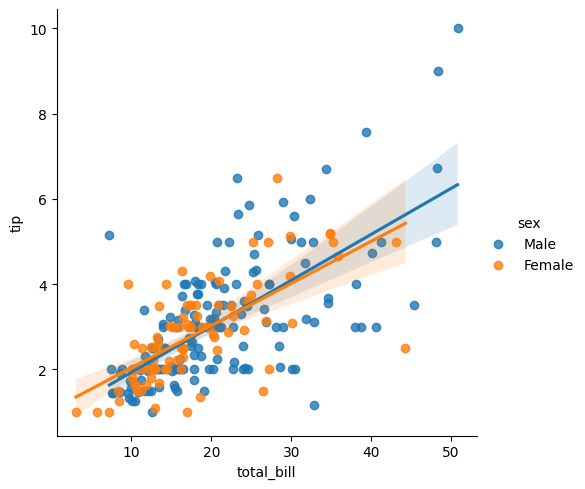

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') # Create a linear model plot of 'total_bill' vs. 'tip', with points and regression lines colored by 'sex'

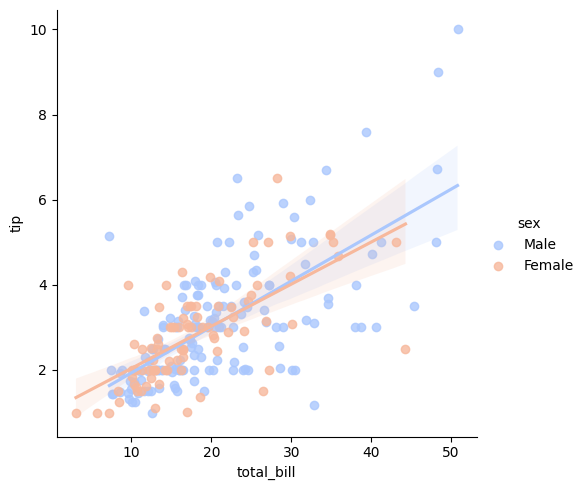

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm') # Create a linear model plot of 'total_bill' vs. 'tip', with points and regression lines colored by 'sex' using the 'coolwarm' palette

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

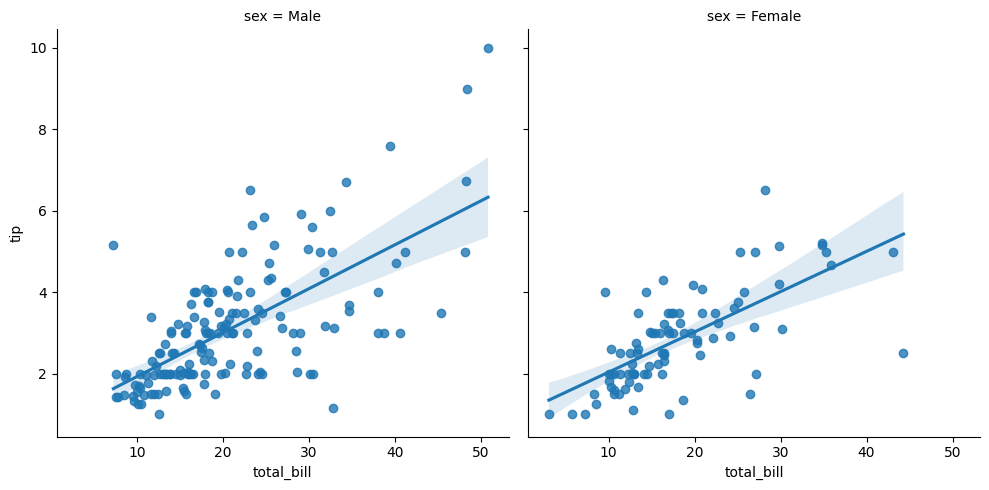

In [55]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') # Create linear model plots of 'total_bill' vs. 'tip', with separate plots arranged by 'sex' in columns

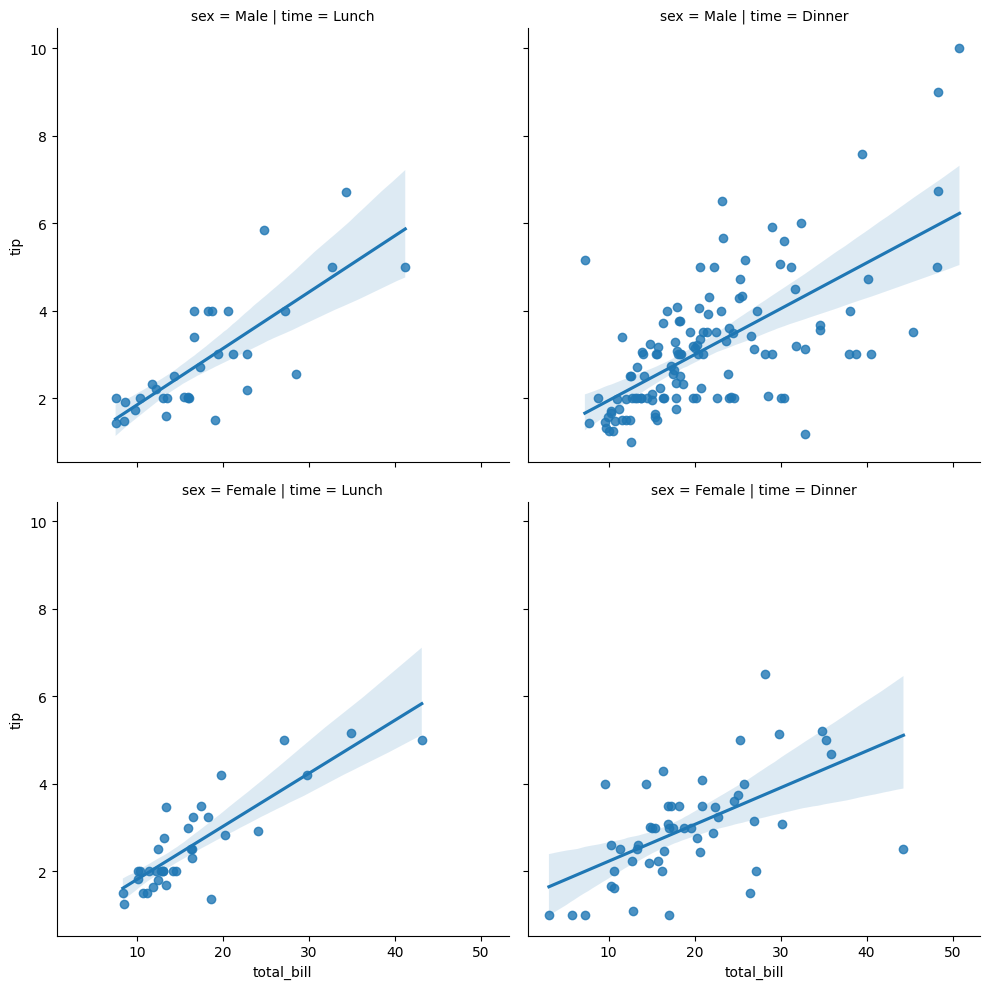

In [56]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips) # Create linear model plots of 'total_bill' vs. 'tip', with separate plots arranged by 'sex' in rows and 'time' in columns

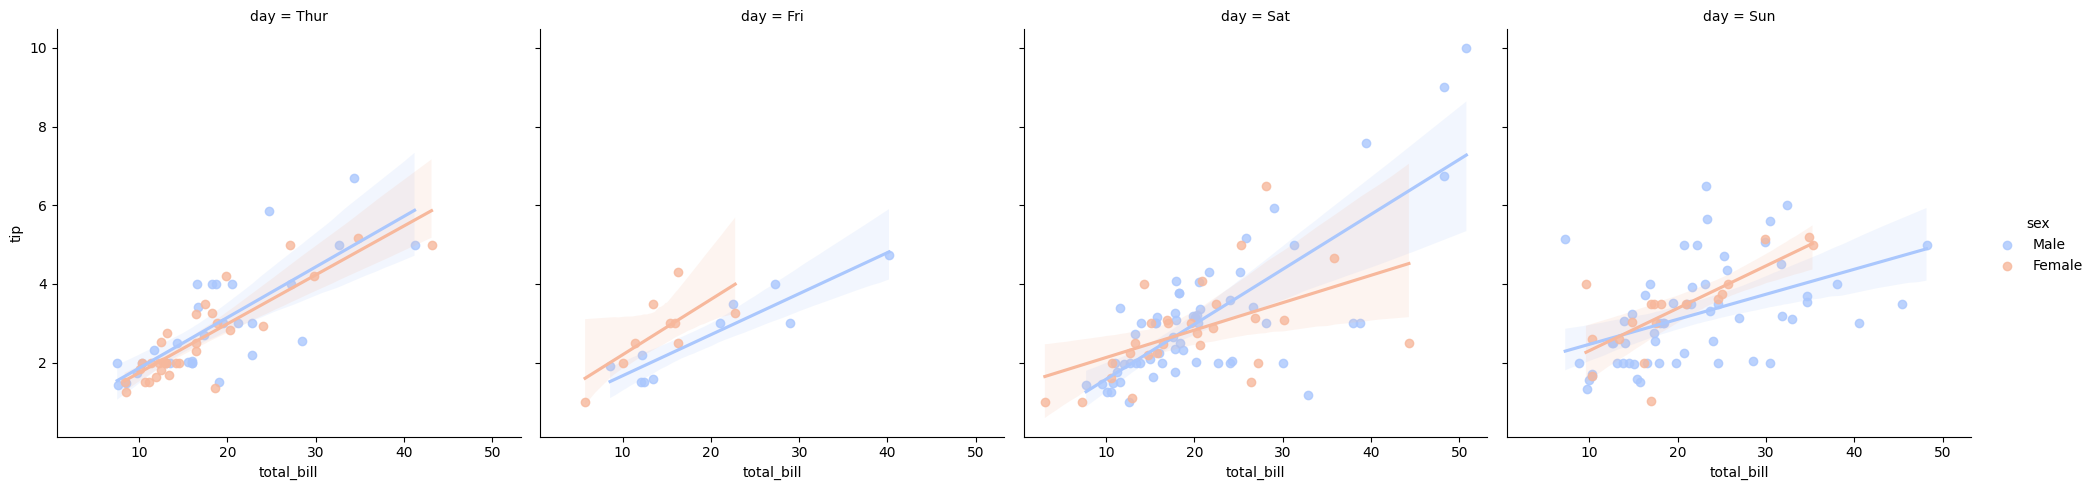

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm') # Create linear model plots of 'total_bill' vs. 'tip', with separate plots arranged by 'day' in columns and points/lines colored by 'sex', using the 'coolwarm' palette

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

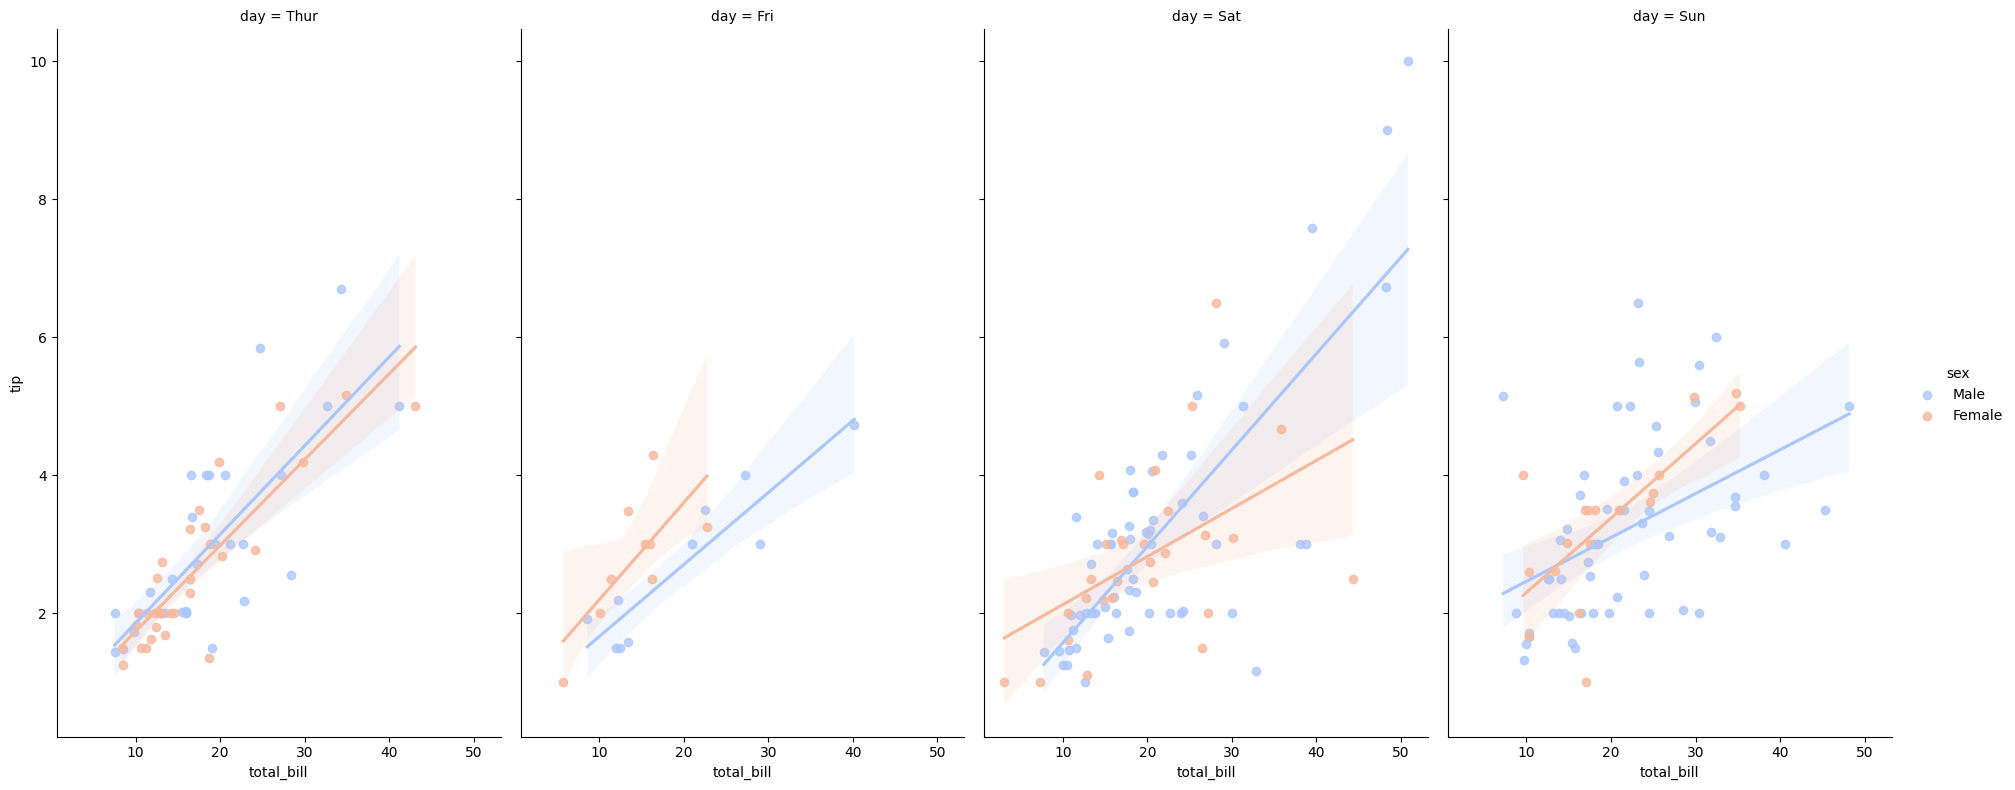

In [58]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm', # Create linear model plots of 'total_bill' vs. 'tip', arranged by 'day' in columns, colored by 'sex', with 'coolwarm' palette
          aspect=0.6,height=8) # Set the aspect ratio of each facet to 0.6 and the height of each facet to 8

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes